# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [1]:
#Everything in this box is purely exploratory. Sandbox. Dinosaurs and sandcastles.

%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

#a function for normalizing a DataFrame
def normalize(df):
    result = df.copy()
    for feature in result.columns:
        max_value = result[str(feature)].max()
        min_value = result[str(feature)].min()
        result[str(feature)] = (result[str(feature)]-min_value) / (max_value-min_value)
    return result

df = pd.read_csv('train.csv')
# df.info()
# pd.plotting.scatter_matrix(df)
selected_df = df.loc[:, ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']]
normalized_selected = normalize(selected_df)
# normalized_selected.plot('zn', 'crim', kind='scatter')
# df_crime.plot(kind='hist')
pd.plotting.scatter_matrix(normalized_selected)

<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a150676d8>,
      dtype=object)

In [2]:
#Summary and 2 measures of centrality for all variables
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [8]:
# A DF, df_high_crime, that captures info about towns at or above the 75% quantile for crime rate
# and its counterpart, df_low_crime, for everything else.
crime_rate_75 = df['crim'].quantile(.75)
df_high_crime = df.loc[df['crim'] >= crime_rate_75]
df_low_crime = df.loc[df['crim'] < crime_rate_75]
df_high_crime.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,84.000000,84.000000,84.0,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.0,84.0,84.000000,84.000000,84.000000
mean,423.273810,12.027551,0.0,1.810000e+01,0.059524,0.677988,5.920393,90.807143,2.072092,24.0,666.0,20.2,297.187976,18.610714,16.851190
std,39.359435,10.634535,0.0,7.148103e-15,0.238024,0.059953,0.701382,10.392198,0.569271,0.0,0.0,0.0,141.369261,6.984341,9.094517
min,357.000000,3.678220,0.0,1.810000e+01,0.000000,0.532000,3.561000,53.200000,1.129600,24.0,666.0,20.2,3.500000,2.960000,5.000000
25%,387.750000,5.685405,0.0,1.810000e+01,0.000000,0.631000,5.557750,87.550000,1.638925,24.0,666.0,20.2,233.132500,13.997500,11.450000
50%,428.500000,9.084990,0.0,1.810000e+01,0.000000,0.693000,6.120500,94.600000,1.983150,24.0,666.0,20.2,379.040000,18.080000,14.750000
75%,458.250000,13.994100,0.0,1.810000e+01,0.000000,0.713000,6.383750,98.825000,2.465825,24.0,666.0,20.2,396.900000,22.970000,20.025000
max,488.000000,73.534100,0.0,1.810000e+01,1.000000,0.770000,7.393000,100.000000,3.545900,24.0,666.0,20.2,396.900000,37.970000,50.000000


In [9]:
df_low_crime.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.00000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,192.819277,0.436463,14.295181,8.997309,0.060241,0.516378,6.38208,60.608835,4.262459,4.787149,322.674699,17.857028,380.475582,10.459197,24.765060
std,123.685066,0.698417,25.229635,6.676523,0.238412,0.099361,0.66691,28.150636,1.982590,2.970092,96.018031,2.192794,39.882979,5.806747,8.313389
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,4.92600,6.000000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,8.100000
25%,90.000000,0.057350,0.000000,4.050000,0.000000,0.439000,5.94900,36.800000,2.597900,4.000000,264.000000,16.400000,383.370000,6.210000,19.400000
50%,179.000000,0.140300,0.000000,6.910000,0.000000,0.504000,6.24500,62.200000,3.945400,4.000000,305.000000,18.000000,392.800000,9.450000,22.900000
75%,280.000000,0.407710,21.000000,10.590000,0.000000,0.547000,6.71800,86.500000,5.502700,5.000000,391.000000,19.200000,396.210000,13.440000,28.000000
max,506.000000,3.568680,100.000000,27.740000,1.000000,0.871000,8.72500,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [10]:
# Two DFs separated by nitrogen oxide (pp10m) at the 75th quantile
# to investigate the correlation of pollution with crime rate
nox_75 = df['nox'].quantile(.75)
df_high_nox = df.loc[df['nox'] >= nox_75]
df_low_nox = df.loc[df['nox'] < nox_75]
df_high_nox.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,369.797619,10.323496,1.666667,17.098690,0.083333,0.718488,5.978310,92.241667,1.932870,20.154762,601.190476,18.945238,303.215595,18.416905,18.252381
std,96.237254,11.171964,5.560908,4.010952,0.278045,0.066358,0.812132,9.186294,0.477017,7.679568,133.086391,2.534409,136.244664,7.564317,10.646041
min,143.000000,0.520140,0.000000,3.970000,0.000000,0.631000,3.561000,48.200000,1.129600,5.000000,264.000000,13.000000,3.500000,2.960000,5.000000
25%,360.750000,3.755472,0.000000,18.100000,0.000000,0.679000,5.532000,88.925000,1.578825,24.000000,666.000000,20.200000,260.270000,13.825000,11.450000
50%,394.000000,7.795775,0.000000,18.100000,0.000000,0.706500,6.128000,94.950000,1.864550,24.000000,666.000000,20.200000,379.585000,17.210000,15.050000
75%,441.250000,12.163900,0.000000,18.100000,0.000000,0.740000,6.405250,99.475000,2.232050,24.000000,666.000000,20.200000,395.992500,23.647500,21.550000
max,467.000000,73.534100,20.000000,19.580000,1.000000,0.871000,8.398000,100.000000,3.066500,24.000000,666.000000,20.200000,396.900000,37.970000,50.000000


In [34]:
df_low_nox.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,210.859438,1.011325,13.732932,9.335100,0.052209,0.502715,6.362542,60.124900,4.309425,6.084337,344.538153,18.280321,378.442169,10.524578,24.292369
std,140.605288,2.937771,25.319291,6.701642,0.222896,0.066520,0.636603,27.750349,1.935874,5.694943,128.304858,1.984185,48.891805,5.652216,8.092244
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,4.973000,6.000000,1.439400,1.000000,188.000000,12.600000,3.650000,1.730000,8.100000
25%,90.000000,0.057350,0.000000,4.490000,0.000000,0.439000,5.949000,36.800000,2.714700,4.000000,270.000000,17.000000,383.230000,6.290000,19.300000
50%,192.000000,0.140300,0.000000,6.960000,0.000000,0.504000,6.230000,62.000000,3.945400,4.000000,307.000000,18.400000,392.900000,9.520000,22.600000
75%,306.000000,0.407710,21.000000,11.930000,0.000000,0.547000,6.635000,85.200000,5.502700,6.000000,398.000000,20.200000,396.240000,13.450000,26.600000
max,506.000000,28.655800,100.000000,27.740000,1.000000,0.624000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [71]:
standardized_crime = normalized_selected.copy()
standardized_crime['crim'] = preprocessing.scale(standardized_crime['crim'])
standardized_high_crime = df_high_crime.copy()
standardized_high_crime = normalize(standardized_high_crime)
standardized_high_crime['crim'] = preprocessing.scale(standardized_high_crime['crim'])

<IPython.core.display.Javascript object>


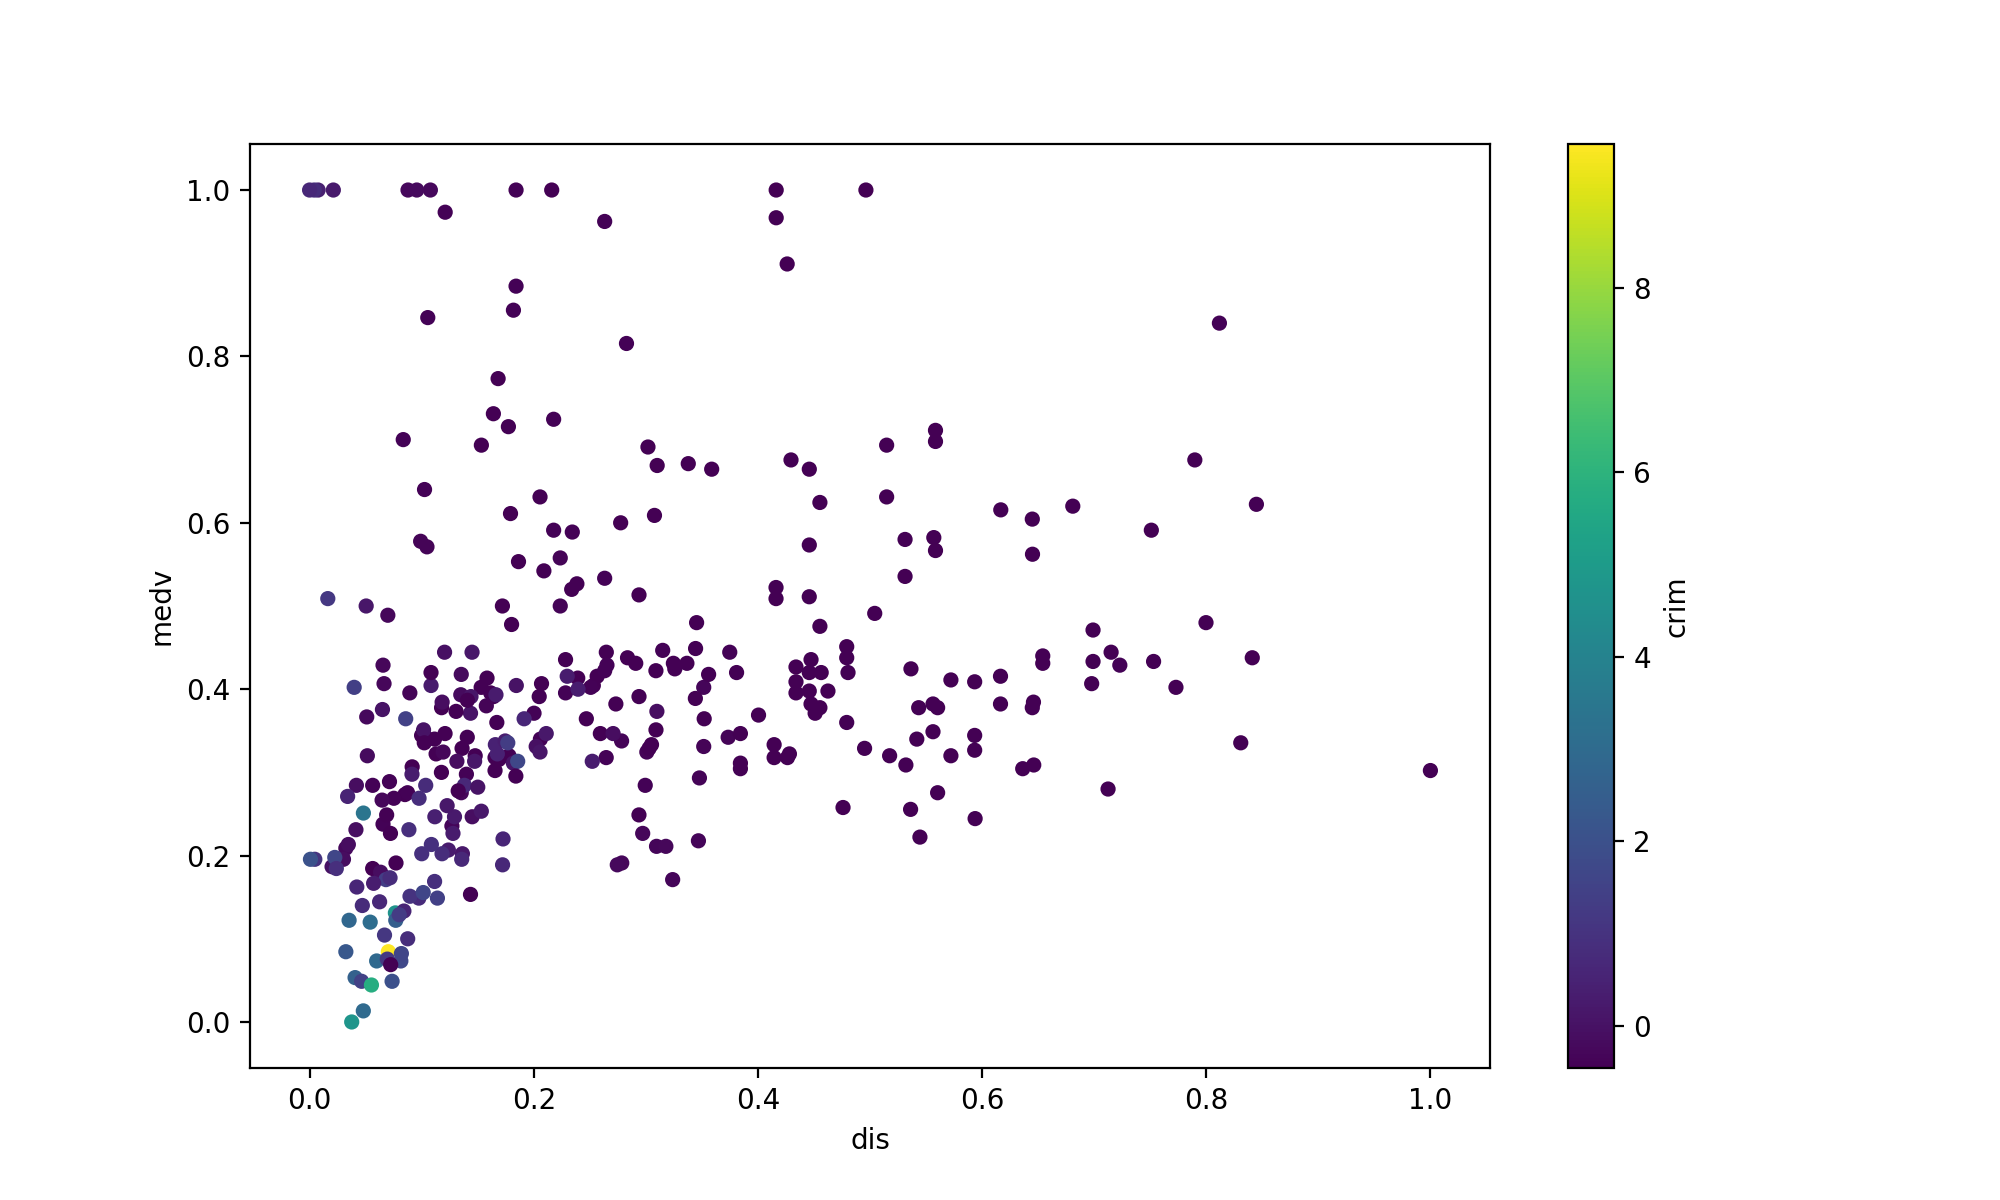

In [83]:
ax = standardized_crime.plot.scatter('dis', 'medv', c='crim', colormap='viridis', figsize=(10,6))

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!